In [49]:
## download the below dependencies to run the project

In [47]:
# pip install pandas
# pip install numpy
# pip install matplotlib.pyplot
# pip install plotly
# pip install seaborn
# pip install imblearn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [41]:
import warnings

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [4]:
import plotly.express as px

In [5]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [39]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [42]:
import seaborn as sns

In [7]:
df = pd.read_csv('Fraud.csv')

In [8]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [9]:
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [10]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [11]:
df["type"] = df["type"].map({"CASH_OUT":1, "PAYMENT":2, 
                             "CASH_IN":3, "TRANSFER":4,
                             "DEBIT":5})
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,2,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,2,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,4,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,2,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [12]:
drop_columns = ["nameOrig", "nameDest"]

In [13]:
data = df.drop(columns=drop_columns, axis=1)

In [14]:
data.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,2,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,2,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,4,181.00,181.0,0.00,0.0,0.0,1,0
3,1,1,181.00,181.0,0.00,21182.0,0.0,1,0
4,1,2,11668.14,41554.0,29885.86,0.0,0.0,0,0


In [15]:
features=["amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest"]

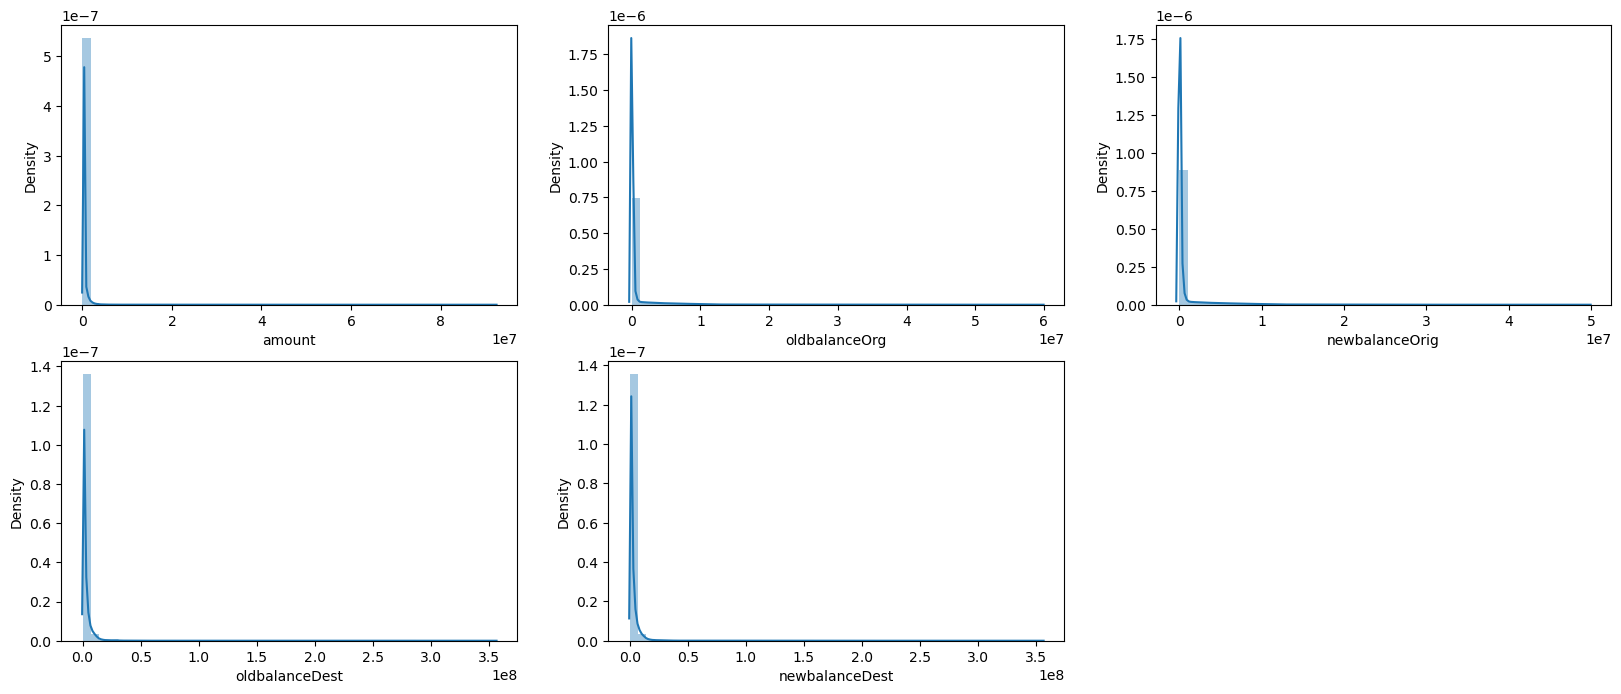

In [16]:
plt.figure(figsize=(20,8))
warnings.filterwarnings('ignore')
for feature in features:
    plt.subplot(2,3, features.index(feature)+1)
    sns.distplot(df[feature])
plt.show()

In [18]:
correlation = data.corr()
print(correlation["isFraud"].sort_values(ascending=False))

isFraud           1.000000
amount            0.076688
isFlaggedFraud    0.044109
step              0.031578
type              0.016171
oldbalanceOrg     0.010154
newbalanceDest    0.000535
oldbalanceDest   -0.005885
newbalanceOrig   -0.008148
Name: isFraud, dtype: float64


In [19]:
 df['isFraud'].value_counts(normalize=True)

isFraud
0    0.998709
1    0.001291
Name: proportion, dtype: float64

In [23]:
data.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,2,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,2,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,4,181.00,181.0,0.00,0.0,0.0,1,0
3,1,1,181.00,181.0,0.00,21182.0,0.0,1,0
4,1,2,11668.14,41554.0,29885.86,0.0,0.0,0,0


In [24]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,2,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,2,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,4,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,2,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [26]:
X = np.array(df[["type","amount", "oldbalanceOrg", "newbalanceOrig", "step", "isFlaggedFraud"]])

In [27]:
y = np.array(df[["isFraud"]])

In [38]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Instantiating the RandomOverSampler
oversampler = RandomOverSampler(random_state=42)

# Fit and transform the data
X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)

# Calculating class weights for the resampled data
class_weights_resampled = dict(zip([0, 1], X_resampled.shape[0] / (2 * np.bincount(y_resampled))))

# Building a logistic regression model with class weights
model = LogisticRegression(random_state=42, class_weight=class_weights_resampled)
model.fit(X_resampled, y_resampled)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Evaluating the model
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

model.score(X_test,y_test)


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98   1270904
           1       0.04      0.90      0.07      1620

    accuracy                           0.97   1272524
   macro avg       0.52      0.94      0.53   1272524
weighted avg       1.00      0.97      0.98   1272524



0.9697231643568216